In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import pydataset as data

import wrangle
from env import get_db_url

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,bed_rms,bath_rms,sq_ft,tax_value,yr_blt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [4]:
df.shape

(2140235, 7)

In [5]:
df = wrangle.remove_stat_outliers(df, 2, ['bed_rms', 'bath_rms', 'sq_ft', 'tax_value', 'yr_blt', 'taxamount'])

In [6]:
df.shape

(1924022, 7)

In [7]:
train, validate, test = wrangle.split_data(df)

In [8]:
train.shape

(1077451, 7)

In [9]:
train_half = df.sample(frac = 0.5)

In [10]:
train_half.shape

(962011, 7)

## 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [11]:
#def plot_variable_pairs(df):
def plot_variable_pairs(df, target):
    cols = df.columns.to_list()
    cols.remove(target)
    
    for col in cols:
        sns.lmplot(data= df, x=col, y=target, line_kws={'color':'red'})
    
    plt.show()

In [12]:
#plot_variable_pairs(train_half, 'tax_value')

In [13]:
np.triu(train_half)

array([[4.00000e+00, 3.00000e+00, 2.36400e+03, ..., 1.97900e+03,
        8.25531e+03, 6.03700e+03],
       [0.00000e+00, 2.00000e+00, 1.45600e+03, ..., 1.94800e+03,
        4.23285e+03, 6.03700e+03],
       [0.00000e+00, 0.00000e+00, 1.60600e+03, ..., 1.96200e+03,
        3.09296e+03, 6.05900e+03],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

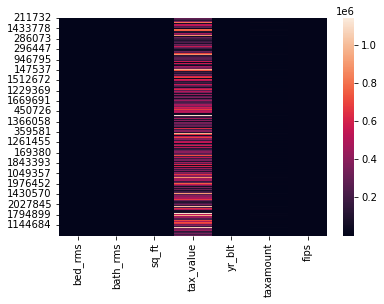

In [14]:
sns.heatmap(train_half, mask=(np.triu(train_half)))
plt.show()

In [15]:
#sns.pairplot(data= train_half, corner = True)

In [16]:
#sns.pairplot(data= train_half.drop(columns = ['tax_value', 'fips']), corner = True)

In [17]:
train_half.head()

,bed_rms,bath_rms,sq_ft,tax_value,yr_blt,taxamount,fips
211732,4.0,3.0,2364.0,676410.0,1979.0,8255.31,6037.0
220178,3.0,2.0,1456.0,315000.0,1948.0,4232.85,6037.0
924078,3.0,1.5,1606.0,257082.0,1962.0,3092.96,6059.0
1963780,2.0,1.0,1248.0,26870.0,1913.0,496.97,6037.0
1761717,3.0,2.0,1920.0,657563.0,1936.0,7753.60,6037.0


In [18]:
#sns.lmplot(data=train_half, x='bed_rms', y='taxamount',
           #line_kws={'color':'red'})
#plt.show()

In [19]:
#sns.pairplot(data= train_half.drop(columns = ['tax_value', 'fips']),kind = 'reg', corner = True)

In [20]:
def plot_variable_pairs(df, target):
    cols = df.columns.to_list()
    cols.remove(target)
    
    for col in cols:
        sns.lmplot(data= df, x=col, y=target, line_kws={'color':'red'})
    
    plt.show()

In [21]:
#plot_variable_pairs(train_half, 'tax_value')

## 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [22]:
cat_vars_list = ['bed_rms', 'bath_rms', 'fips']
cont_vars_list = ['taxamount', ]

In [27]:
def plot_categorical_and_continuous_vars(df, cat_vars_list, cont_vars_list):
    
    for col in cat_vars_list:
        for col2 in cont_vars_list:
            fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,6))
            fig.suptitle(f'{col} vs. {col2}')
            sns.boxplot(data=df, x=col, y=col2, ax=ax1)
            sns.violinplot(data=df, x=col, y=col2, ax=ax2)
            sns.barplot(data=df, x=col, y=col2, ax=ax3)
            plt.show()

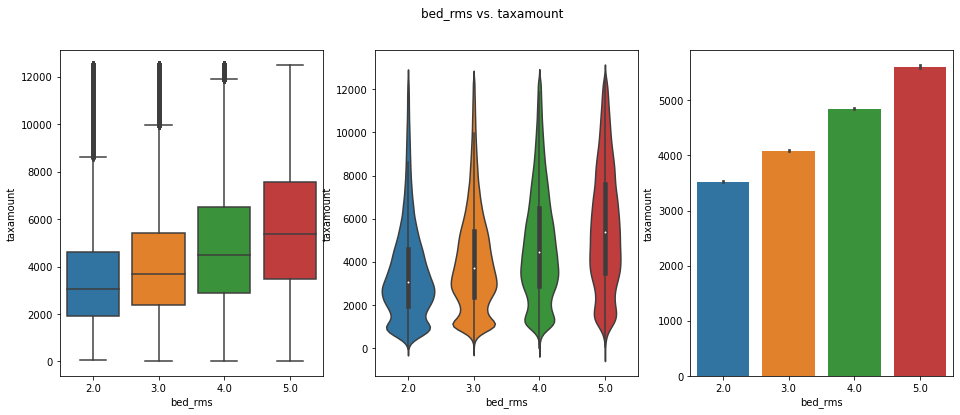

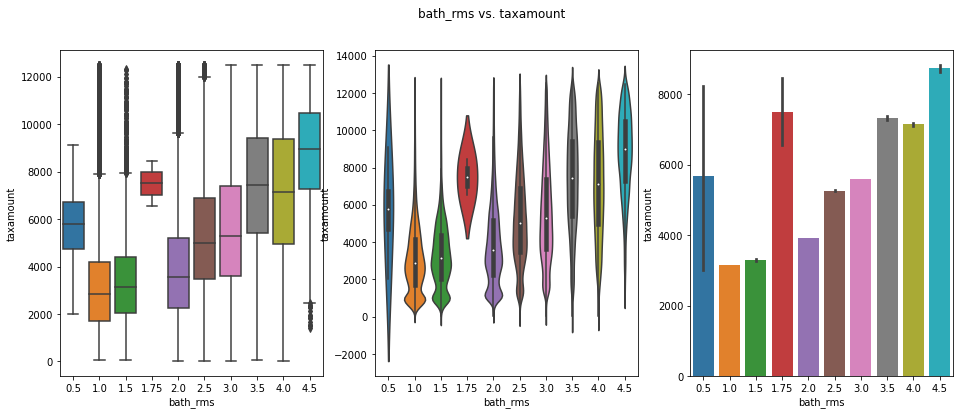

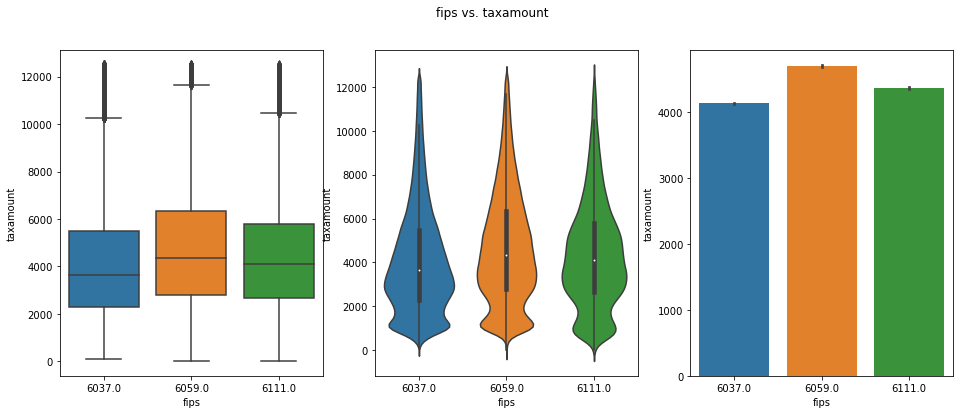

In [28]:
plot_categorical_and_continuous_vars(train_half, cat_vars_list, cont_vars_list )

# 5) Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

## Functions to be saved:
-  plot_categorical_and_continuous_vars
- plot_variable_pairs